__Скоринг__

__Данные__


- В файле данные и результаты прогноза по первичным клиентам по  Москве.
- На вкладке «Исх данные» находятся первоначальные данные и  данные  по результату выданных кредитов. 
- На вкладке «Модель»  находятся  преобразованные данные и результат расчета скоринга по  ним. _Для того, чтобы понять, в чем состоит различие и какое было сделано преобразование, сравним оба датасета_
- А на  вкладке «Res» находится оценка того, как будет изменяться  одобрение и  доходность от выдачи кредитов, если мы выберем тот или  иной уровень  отсечения.
-  Формула создавалась без данных Мегафона. Поэтому для целей  сравнения Вам предлагается посчитать вероятности также без этих  данных. _Для этого будем анализировать 2 датасета: с данными Мегафона и без_



__Таргет__

В качестве прогноза бралась вероятность  погашения кредита  с просрочкой до 15 дней, поэтому с ростом  вероятности улучшаются  показатели доходов. Данные в столбце res_npl_15 (описание будет ниже) и были приняты за таргет



__Описание полей исходных данных:__
- 1. al_ContractNumber – номер одобренного кредита 
- 2. al_amount –  сумма одобренного кредита 
- 3. al_issue_M – месяц выдачи одобренного  кредита 
- 4. psp_issue_rgn – регион выдачи паспорта клиента 
- 5. sex – пол  (1-мужчины, 2 – женщины) 
- 6. is_client_local – является ли клиент  местным по отношению к офису выдачи кредита (1-да, 0 – нет).Сравнивается регион выдачи паспорта клиента и регион офиса
- 7. has_snils – предоставил ли клиент снилс при запросе кредита 
- 8.zaim_cards – наличие у клиента карты Займ-Экспресс на момент  запроса  кредита 
- 9. age – возраст по группам (1-до 25 лет, 2 – 25-35 лет, 3- 35 и  более лет)                   
- 10. responsecode – код ответа от БКИ по наличию  данных  о  кредитах у клиента на момент заявки. (0 – нет данных о  клиенте  вообще  в БКИ, 1 – есть данные, 3 – есть данные о клиенте, но  нет  данных о  кредитах, 98 – таких данных нет, но это всего одна строка такая)
- 11.  was_garant – был ли клиент гарантом по займу 
- 12. is_pboul – является  ли  клиент ИП 
- 13. has_foreign_currency_credits – были ли у клиента  займы в  иностранной валюте 
- 14. court_counts – количесвто судов по  клиенту на  момент запроса кредита 
- 15. official_count – кол-во  оспаривания  судебных решений 
- 16. cred_line_state – статус кредитной  линии  
- 17.  potreb_tot – наличие в истории потребительских кредитов (0 – нет, 1 –    есть)
- 18. potreb_closed_tot – количество закрытых потребительских  кредитов  клиента на момент запроса кредита 
- 19. potreb_active_tot –  количество  открытых потребительских кредитов на момент запроса 
- 20.potreb_other_states_tot – кол-во потребительских кредитов с  другими  статусами на момент запроса
- 21. pdl_tot – наличие потреб  кредитов на  момент займа                                              
- 22. pdl_closed_tot – кол-во закрытых pdl –  займов
- 23. pdl_active_tot – кол-во активных pdl – займов
- 24. pdl_own_share –  доля  pdl – займов клиента в нашей компании
- 25. pdl_delay5_cnt,  pdl_delay30_cnt и т.д. – кол-во закрытых просрочек клиента по pdl-  займам до 5, 30 и более дней
- 26. pdl_prolong_cnt – кол-во пролонгаций pdl- займов
- 27. avg_pdl_full_cost – средняя стоимость pdl-кредита,  который брал клиент (1-это до 1% в день, 2 – более 1%)
- 28. avg_pdl_amount – средняя сумма pdl-займа клиента на момент  запроса
- 29. pdl_delay5_avg – среднее кол-во закрытых просрочек по pdl-  займам
- 30. al_LIFETIME_BIN, al_BLOCK_DUR, al_CIRCLE, al_ALL_CLC,  al_PAY_MAX –  бины Мегафона (onefactor)
- 31. al_SCORE2 – скоринговый  балл Мегафона (бектест)

Результирующие данные (их не надо использовать в  качестве  предсказательных признаков), они используются для  построения  таблицы с результатами:
- 32. res_npl_15 – это результат (бинарная функция). Оплатил ли  клиент  займ полностью до 15ти дней просрочки   
- 33. res_npl_90 – оплатил  ли он  кредит до 90 дней просрочки
- 34. res_payout_principal_inTime –  сумма  оплаты тела кредита до просрочки (и аналогичные поля с  разными  сроками просрочки) 
- 35. res_payout_tot_inTime – общая сумма  платежей  клиента до просрочки, включая тело и проценты   
- 36.  fl_cnt_during_3M (12М) – количество кредитов, взятых клиентом, после выплаты по  одобренному кредиту в течении 3х (12ти) месяцев с момента выплаты  кредита (используем для оцени возвращения клиента).
- 37. is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка).  

## Чтение данных и импорт нужных библиотек:

In [133]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
 
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [134]:
init_data = pd.read_excel('Первичники по Москве (для теста).xlsx', sheet_name='Исх данные', skiprows=1) 

In [135]:
upd_data = pd.read_excel('Первичники по Москве (для теста).xlsx', sheet_name='Модель', skiprows=1) 

## EDA

Рассмотрим, какие типы данных у столбцов и сколько пропусков:

In [101]:
display(init_data.head()) 
init_data.info() 

,al_ContractNumber,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,was_garant,is_pboul,has_foreign_currency_credits,court_counts,official_count,has_resold_credits,cred_line_state,potreb_tot,potreb_closed_tot,potreb_active_tot,potreb_other_states_tot,pdl_tot,pdl_closed_tot,pdl_active_tot,pdl_other_states_tot,...,al_LIFETIME_BIN,al_BLOCK_DUR,al_CIRCLE,al_ALL_CLC,al_PAY_MAX,al_SCORE2,res_npl_15,res_npl_90,res_payout_principal_inTime,res_payout_principal_delay15,res_payout_principal_delay30,res_payout_principal_delay45,res_payout_principal_delay60,res_payout_principal_delay90,res_payout_tot_inTime,res_payout_tot_delay15,res_payout_tot_delay30,res_payout_tot_delay45,res_payout_tot_delay60,res_payout_tot_delay90,fl_cnt,fl_cnt_during_3M,fl_cnt_during_12M,fl_requests_cnt_12M,is_test
0,882-001-17,3000,1,30,1,0,0,0,2,1,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,...,1,0,1,3,3,0.209782,0,1,0.0,280.0,3000.0,3000.0,3000.0,3000.0,0.0,1000.0,4590.4,4590.4,4590.4,4590.4,1,1,1,1,0
1,1776-001-17,5000,1,55,1,0,1,0,2,1,0,0,0,0,0,0,2,1,2,0,0,1,12,1,4,...,1,0,5,5,5,0.253080,1,1,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,6500.0,6500.0,6500.0,6500.0,6500.0,6500.0,1,1,1,1,0
2,2234-001-17,5000,1,32,1,0,1,0,3,1,0,0,0,0,0,0,2,1,1,0,0,1,1,0,0,...,2,0,0,2,3,0.213614,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,2649-001-17,5000,1,77,2,1,1,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,5,2,5,3,3,0.121961,1,1,0.0,5000.0,5000.0,5000.0,5000.0,5000.0,1500.0,8000.0,8000.0,8000.0,8000.0,8000.0,2,1,2,3,0
4,2320-001-17,3000,1,77,2,1,1,0,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.171182,1,1,0.0,3000.0,3000.0,3000.0,3000.0,3000.0,0.0,3960.0,3960.0,3960.0,3960.0,3960.0,1,1,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   al_ContractNumber             9986 non-null   object 
 1   al_amount                     9986 non-null   int64  
 2   al_issue_M                    9986 non-null   int64  
 3   psp_issue_rgn                 9986 non-null   int64  
 4   sex                           9986 non-null   int64  
 5   is_client_local               9986 non-null   int64  
 6   has_snils                     9986 non-null   int64  
 7   zaim_cards                    9986 non-null   int64  
 8   age                           9986 non-null   int64  
 9   responsecode                  9986 non-null   int64  
 10  was_garant                    9986 non-null   int64  
 11  is_pboul                      9986 non-null   int64  
 12  has_foreign_currency_credits  9986 non-null   int64  
 13  cou

In [102]:
display(upd_data.head()) 
upd_data.info() 

,al_ContractNumber,al_amount,al_issue_M_group,psp_issue_rgn_group,sex,is_client_local,has_snils,zaim_cards,age,responsecode,has_foreign_currency_credits,court_counts,official_count,has_resold_credits,cred_line_state,potreb_tot,potreb_active_tot_group,potreb_other_states_tot,pdl_tot,pdl_closed_tot,pdl_active_to_total_group,pdl_delay5_cnt,pdl_delay30_cnt,pdl_delay60_cnt,pdl_delay90_cnt,...,pdl_delay_more_avg,al_LIFETIME_BIN,al_BLOCK_DUR,al_PAY_MAX,al_SCORE2,res_npl_15,res_npl_90,res_payout_principal_inTime,res_payout_principal_delay15,res_payout_principal_delay30,res_payout_principal_delay45,res_payout_principal_delay60,res_payout_principal_delay90,res_payout_tot_inTime,res_payout_tot_delay15,res_payout_tot_delay30,res_payout_tot_delay45,res_payout_tot_delay60,res_payout_tot_delay90,fl_cnt,fl_cnt_during_3M,fl_cnt_during_12M,fl_requests_cnt_12M,is_test,Без МФ
0,882-001-17,3000,1,2,1,0,0,0,2,1,0,0,0,0,2,1,3,0,0,0,2,0,0,0,0,...,0,1,1,3,1,0,1,0.0,280.0,3000.0,3000.0,3000.0,3000.0,0.0,1000.0,4590.4,4590.4,4590.4,4590.4,1,1,1,1,0,0.255110
1,1776-001-17,5000,1,1,1,0,1,0,2,1,0,0,0,0,2,1,3,0,1,1,1,0,1,0,1,...,0,1,1,5,1,1,1,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,6500.0,6500.0,6500.0,6500.0,6500.0,6500.0,1,1,1,1,0,0.214343
2,2234-001-17,5000,1,1,1,0,1,0,3,1,0,0,0,0,2,1,3,0,1,1,1,0,0,0,0,...,0,2,1,3,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.202411
3,2649-001-17,5000,1,4,2,1,1,0,3,0,0,0,0,0,2,0,3,0,0,0,2,0,0,0,0,...,0,5,1,3,0,1,1,0.0,5000.0,5000.0,5000.0,5000.0,5000.0,1500.0,8000.0,8000.0,8000.0,8000.0,8000.0,2,1,2,3,0,0.820044
4,2320-001-17,3000,1,4,2,1,1,0,3,0,0,0,0,0,2,0,3,0,0,0,2,0,0,0,0,...,0,0,1,0,0,1,1,0.0,3000.0,3000.0,3000.0,3000.0,3000.0,0.0,3960.0,3960.0,3960.0,3960.0,3960.0,1,1,1,1,0,0.925201


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   al_ContractNumber             9983 non-null   object 
 1   al_amount                     9983 non-null   int64  
 2   al_issue_M_group              9983 non-null   int64  
 3   psp_issue_rgn_group           9983 non-null   int64  
 4   sex                           9983 non-null   int64  
 5   is_client_local               9983 non-null   int64  
 6   has_snils                     9983 non-null   int64  
 7   zaim_cards                    9983 non-null   int64  
 8   age                           9983 non-null   int64  
 9   responsecode                  9983 non-null   int64  
 10  has_foreign_currency_credits  9983 non-null   int64  
 11  court_counts                  9983 non-null   int64  
 12  official_count                9983 non-null   int64  
 13  has

В обработанном датасете колонок меньше, чем в первичном, выясним, какие столбцы были удалены/добавлены/преобразованы

In [103]:
set(init_data.columns) - set(upd_data.columns)

{'al_ALL_CLC',
 'al_CIRCLE',
 'al_issue_M',
 'is_pboul',
 'pdl_active_tot',
 'pdl_other_states_tot',
 'pdl_own_share',
 'potreb_active_tot',
 'potreb_closed_tot',
 'psp_issue_rgn',
 'was_garant'}

In [104]:
set(upd_data.columns) - set(init_data.columns)

{'al_issue_M_group',
 'pdl_active_to_total_group',
 'potreb_active_tot_group',
 'psp_issue_rgn_group',
 'Без МФ'}

вот так нагляднее видно, что пропусков в данных нет

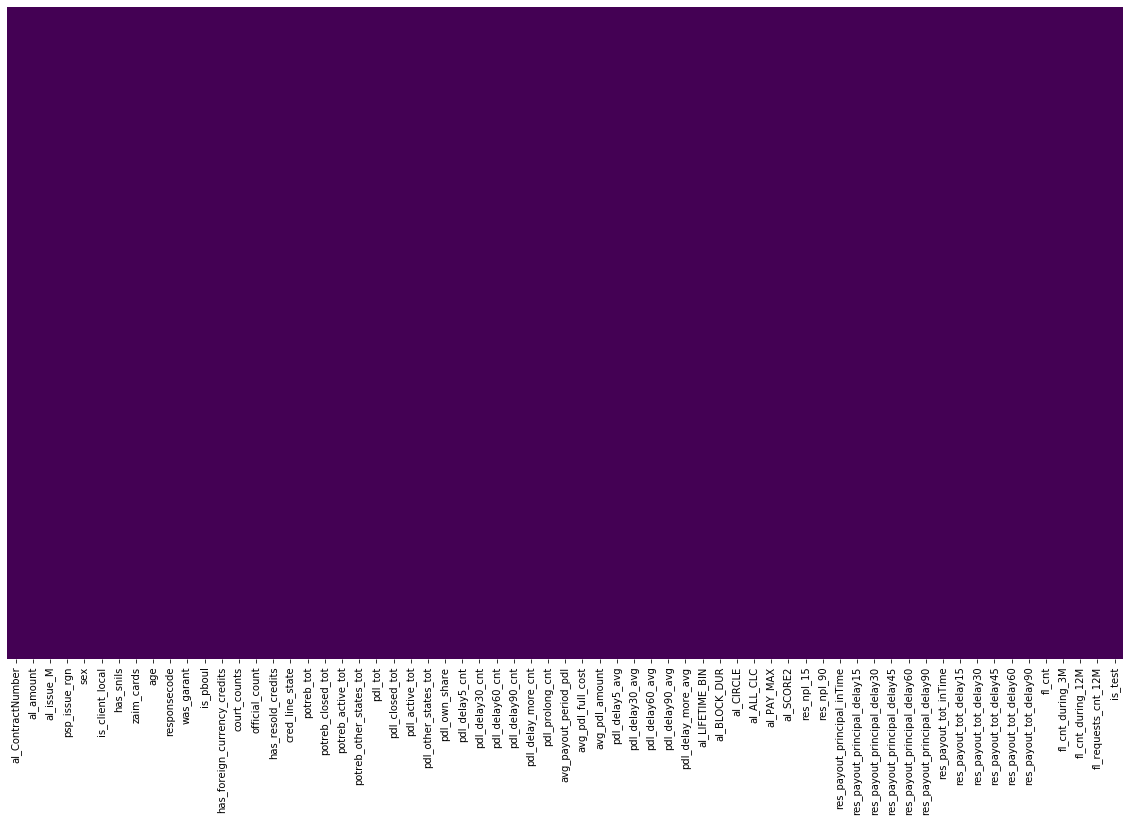

In [105]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(init_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

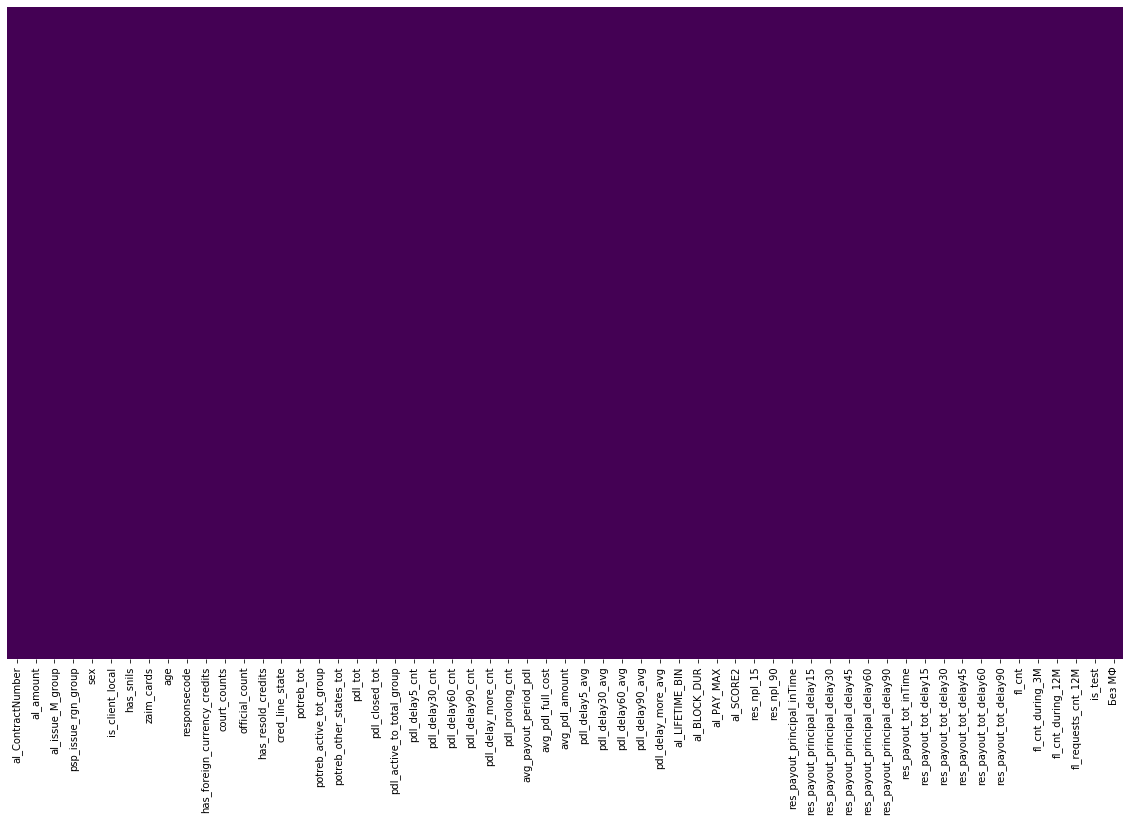

In [106]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(upd_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Пропуски отсутствуют, в преобразованном датасете на 3 строки меньше, чем в первичном, на несколько столбцов датасеты различаются

Напишем функцию, которая покажет нам распределение признаков, выдаст процент пропусков и покажет выбросы для столбцов, у которых определены значения (по описанию датасета). Функцию будем применять только для исходного датасета (для экономии времени будем считать, что все необходимые преобразования и анализ для преобразованного датасета сделаны)

In [91]:
def desription(col, boundaries = None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    if init_data.loc[:, col].dtypes == np.dtype('O'): # Проверка на строковый тип данных
        sns.countplot(train.loc[:, col], ax=ax)
        plt.show()
    else:
        
        init_data.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None: # Проверка на наличие выбросов по информации из датасета
            if init_data.loc[(~init_data.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(init_data.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(init_data.loc[(~init_data.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(init_data.loc[:, col])])
                
    print('Процент пропусков:', str(round(100 - init_data.loc[:, col].count()/init_data.shape[0]*100, 2)) + '%')
    print()
    print('Детальное описание:')
    print(init_data.loc[:, col].describe())

Столбец al_amount
Распределение признака:


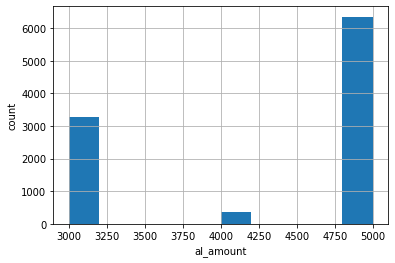

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean     4306.629281
std       933.068078
min      3000.000000
25%      3000.000000
50%      5000.000000
75%      5000.000000
max      5000.000000
Name: al_amount, dtype: float64
Столбец al_issue_M
Распределение признака:


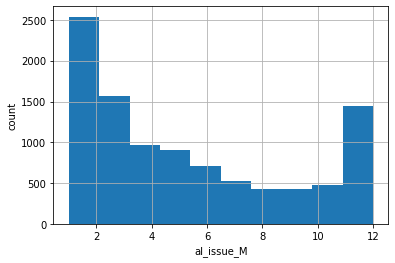

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        5.365612
std         3.532582
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        12.000000
Name: al_issue_M, dtype: float64
Столбец psp_issue_rgn
Распределение признака:


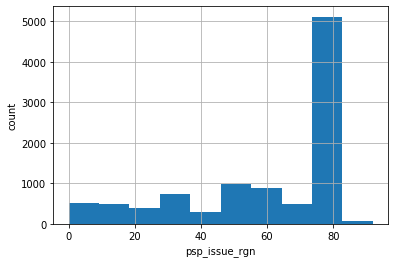

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean       59.231724
std        23.641590
min         0.000000
25%        48.000000
50%        77.000000
75%        77.000000
max        92.000000
Name: psp_issue_rgn, dtype: float64
Столбец sex
Распределение признака:


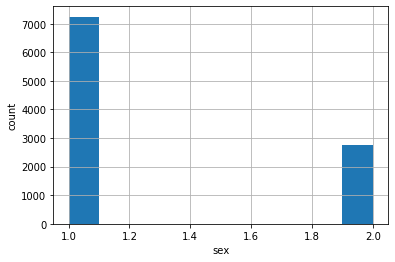

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        1.274685
std         0.446378
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: sex, dtype: float64
Столбец is_client_local
Распределение признака:


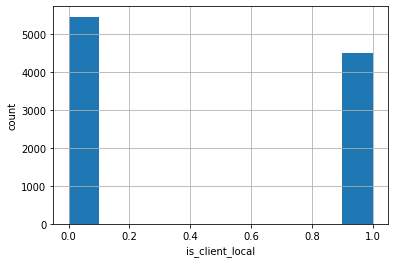

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.452834
std         0.497795
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_client_local, dtype: float64
Столбец has_snils
Распределение признака:


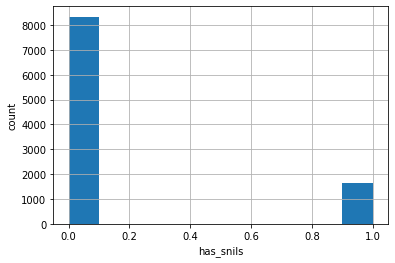

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.165532
std         0.371678
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: has_snils, dtype: float64
Столбец zaim_cards
Распределение признака:


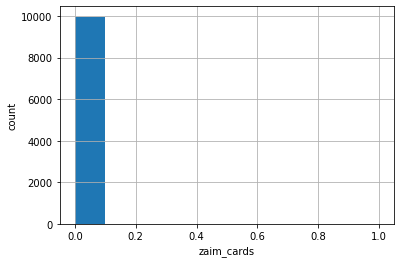

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.001702
std         0.041227
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: zaim_cards, dtype: float64
Столбец age
Распределение признака:


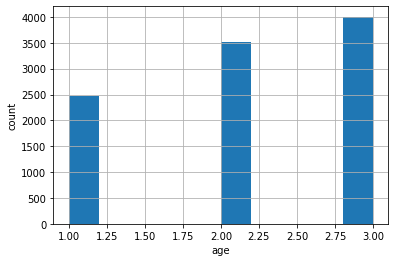

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        2.153815
std         0.790260
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: age, dtype: float64
Столбец responsecode
Распределение признака:


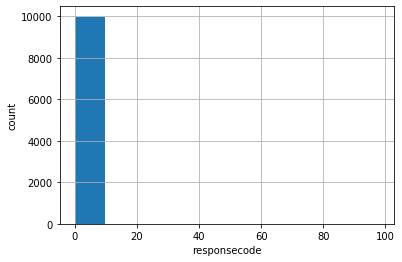

Найдены выбросы:


,al_ContractNumber,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,was_garant,is_pboul,has_foreign_currency_credits,court_counts,official_count,has_resold_credits,cred_line_state,potreb_tot,potreb_closed_tot,potreb_active_tot,potreb_other_states_tot,pdl_tot,pdl_closed_tot,pdl_active_tot,pdl_other_states_tot,...,al_LIFETIME_BIN,al_BLOCK_DUR,al_CIRCLE,al_ALL_CLC,al_PAY_MAX,al_SCORE2,res_npl_15,res_npl_90,res_payout_principal_inTime,res_payout_principal_delay15,res_payout_principal_delay30,res_payout_principal_delay45,res_payout_principal_delay60,res_payout_principal_delay90,res_payout_tot_inTime,res_payout_tot_delay15,res_payout_tot_delay30,res_payout_tot_delay45,res_payout_tot_delay60,res_payout_tot_delay90,fl_cnt,fl_cnt_during_3M,fl_cnt_during_12M,fl_requests_cnt_12M,is_test
1548,37269-008-17,5000,2,77,1,1,0,0,3,98,0,0,0,0,0,1,2,1,8,0,0,1,1,0,0,...,1,0,5,2,5,0.197846,1,1,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5300.0,5300.0,5300.0,5300.0,5300.0,5300.0,1,1,1,1,0


Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.578209
std         1.098523
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        98.000000
Name: responsecode, dtype: float64
Столбец was_garant
Распределение признака:


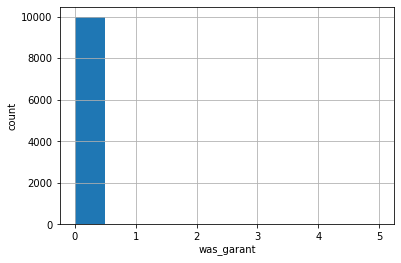

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.002904
std         0.091126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: was_garant, dtype: float64
Столбец is_pboul
Распределение признака:


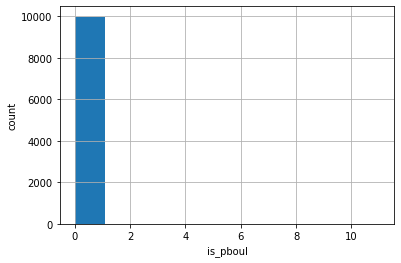

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.001102
std         0.110077
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: is_pboul, dtype: float64
Столбец has_foreign_currency_credits
Распределение признака:


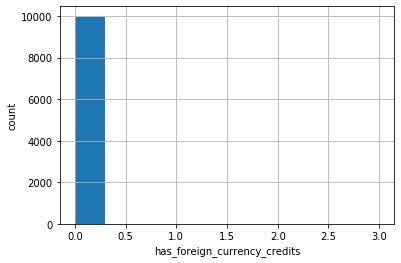

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.002303
std         0.059160
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: has_foreign_currency_credits, dtype: float64
Столбец court_counts
Распределение признака:


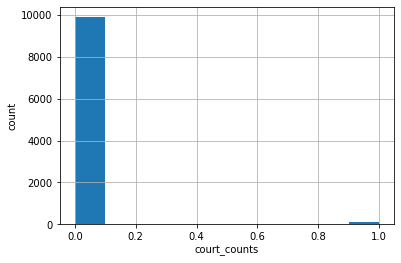

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.010114
std         0.100064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: court_counts, dtype: float64
Столбец official_count
Распределение признака:


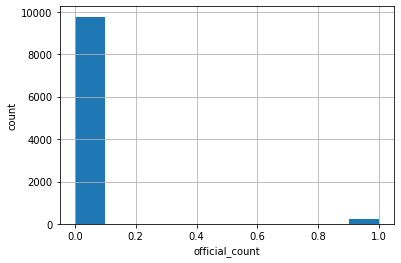

Процент пропусков: 0.0%

Детальное описание:
count    9986.00000
mean        0.02143
std         0.14482
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: official_count, dtype: float64
Столбец has_resold_credits
Распределение признака:


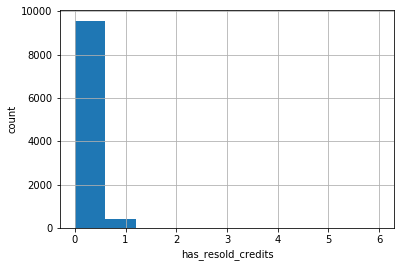

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.047767
std         0.251628
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: has_resold_credits, dtype: float64
Столбец cred_line_state
Распределение признака:


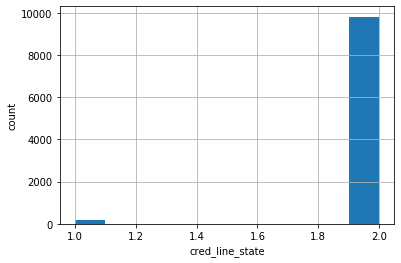

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        1.982776
std         0.130112
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: cred_line_state, dtype: float64
Столбец potreb_tot
Распределение признака:


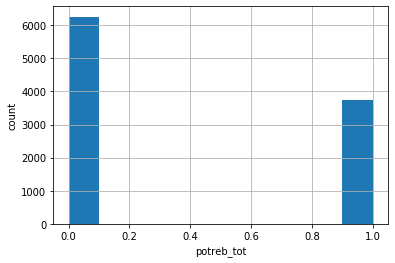

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.373823
std         0.483842
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: potreb_tot, dtype: float64
Столбец potreb_closed_tot
Распределение признака:


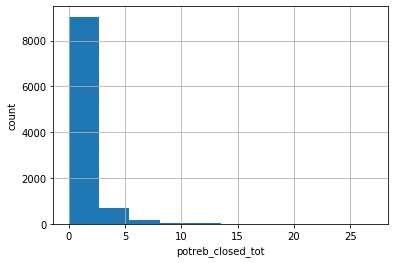

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.674444
std         1.715365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        27.000000
Name: potreb_closed_tot, dtype: float64
Столбец potreb_active_tot
Распределение признака:


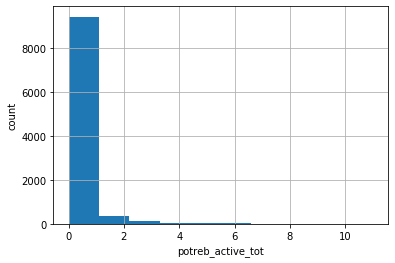

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.269577
std         0.748244
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: potreb_active_tot, dtype: float64
Столбец potreb_other_states_tot
Распределение признака:


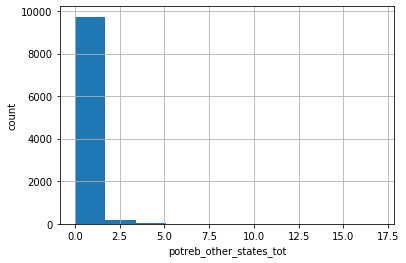

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.114160
std         0.662755
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.000000
Name: potreb_other_states_tot, dtype: float64
Столбец pdl_tot
Распределение признака:


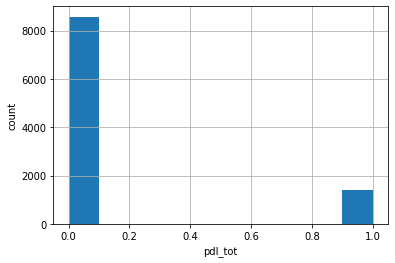

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.141398
std         0.348449
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_tot, dtype: float64
Столбец pdl_closed_tot
Распределение признака:


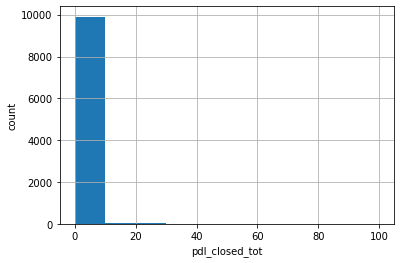

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.375426
std         2.899925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: pdl_closed_tot, dtype: float64
Столбец pdl_active_tot
Распределение признака:


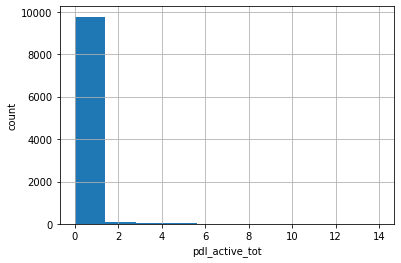

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.126878
std         0.768707
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.000000
Name: pdl_active_tot, dtype: float64
Столбец pdl_other_states_tot
Распределение признака:


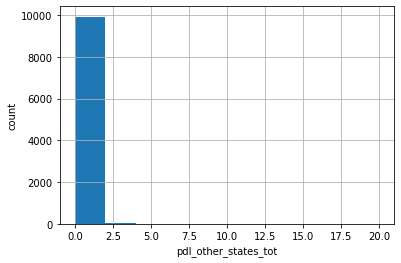

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.032646
std         0.456562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: pdl_other_states_tot, dtype: float64
Столбец pdl_own_share
Распределение признака:


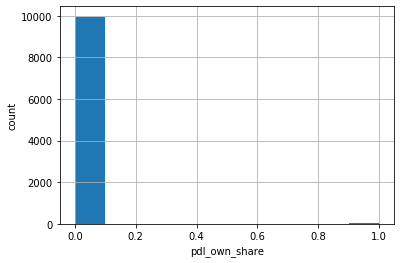

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.003004
std         0.054731
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_own_share, dtype: float64
Столбец pdl_delay5_cnt
Распределение признака:


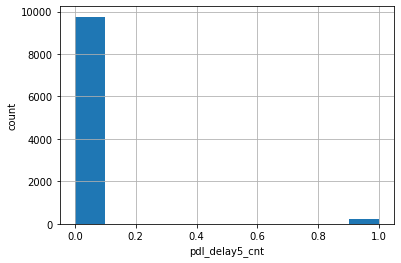

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.023433
std         0.151281
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay5_cnt, dtype: float64
Столбец pdl_delay30_cnt
Распределение признака:


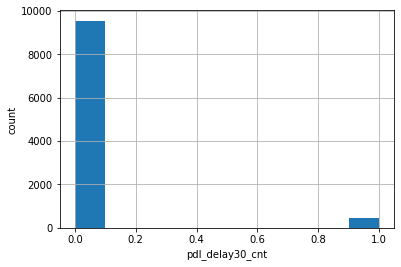

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.044763
std         0.206793
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay30_cnt, dtype: float64
Столбец pdl_delay60_cnt
Распределение признака:


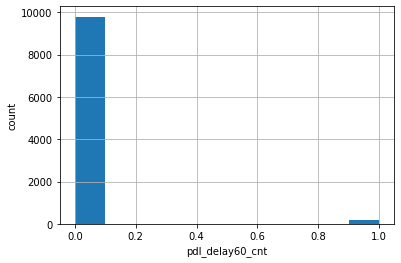

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.019728
std         0.139070
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay60_cnt, dtype: float64
Столбец pdl_delay90_cnt
Распределение признака:


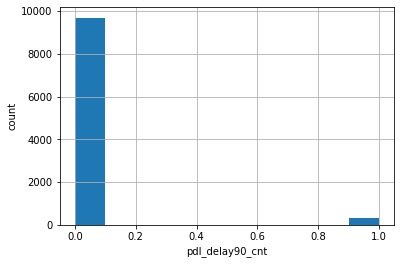

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.030443
std         0.171810
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay90_cnt, dtype: float64
Столбец pdl_delay_more_cnt
Распределение признака:


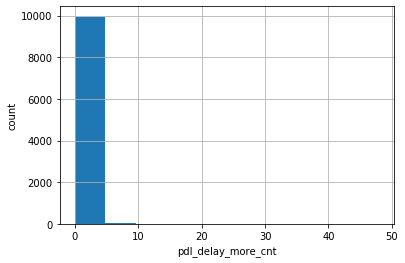

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.075806
std         0.918710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        48.000000
Name: pdl_delay_more_cnt, dtype: float64
Столбец pdl_prolong_cnt
Распределение признака:


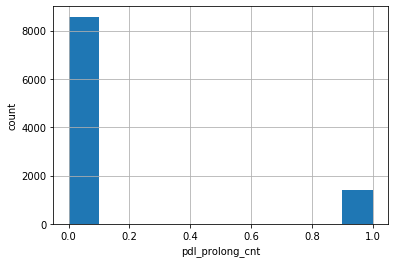

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.141398
std         0.348449
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_prolong_cnt, dtype: float64
Столбец avg_payout_period_pdl
Распределение признака:


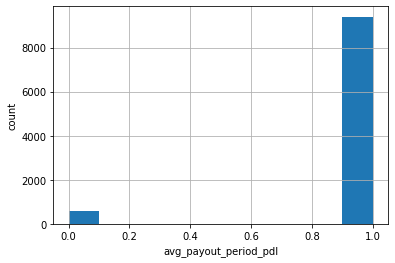

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.941518
std         0.234664
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: avg_payout_period_pdl, dtype: float64
Столбец avg_pdl_full_cost
Распределение признака:


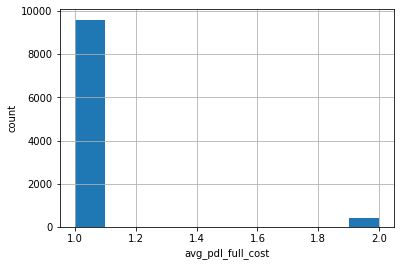

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        1.039255
std         0.194211
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: avg_pdl_full_cost, dtype: float64
Столбец avg_pdl_amount
Распределение признака:


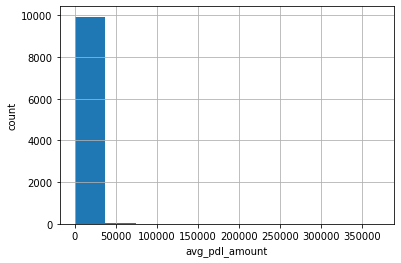

Процент пропусков: 0.0%

Детальное описание:
count      9986.000000
mean       1771.111257
std        7744.708255
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      371304.190000
Name: avg_pdl_amount, dtype: float64
Столбец pdl_delay5_avg
Распределение признака:


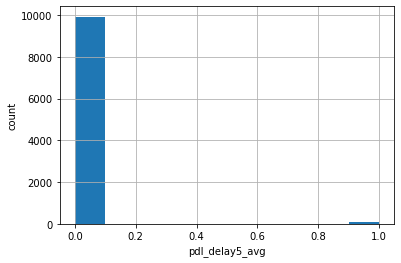

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.007010
std         0.083435
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay5_avg, dtype: float64
Столбец pdl_delay30_avg
Распределение признака:


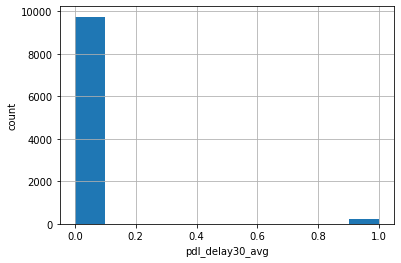

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.024334
std         0.154092
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay30_avg, dtype: float64
Столбец pdl_delay60_avg
Распределение признака:


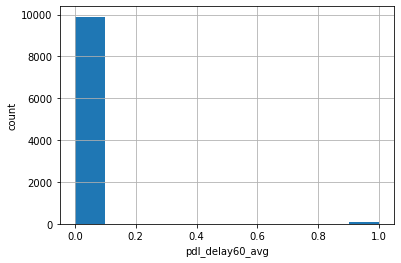

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.009513
std         0.097076
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay60_avg, dtype: float64
Столбец pdl_delay90_avg
Распределение признака:


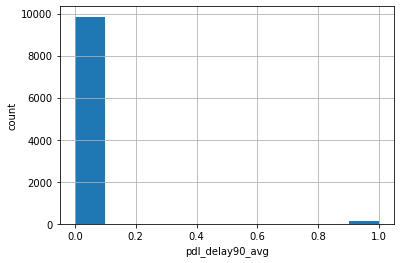

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.013919
std         0.117163
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pdl_delay90_avg, dtype: float64
Столбец pdl_delay_more_avg
Распределение признака:


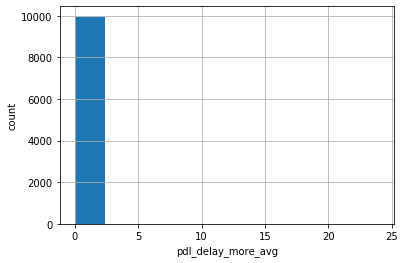

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.033847
std         0.529033
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.000000
Name: pdl_delay_more_avg, dtype: float64
Столбец al_LIFETIME_BIN
Распределение признака:


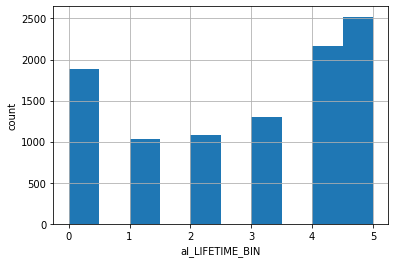

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        2.840477
std         1.849871
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: al_LIFETIME_BIN, dtype: float64
Столбец al_BLOCK_DUR
Распределение признака:


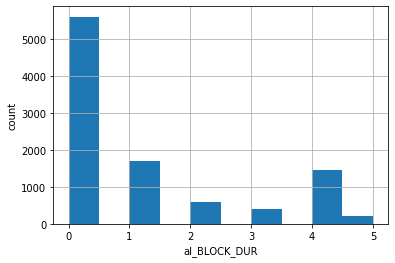

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        1.106048
std         1.565486
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         5.000000
Name: al_BLOCK_DUR, dtype: float64
Столбец al_CIRCLE
Распределение признака:


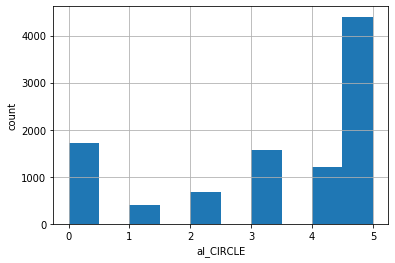

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        3.338774
std         1.883671
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: al_CIRCLE, dtype: float64
Столбец al_ALL_CLC
Распределение признака:


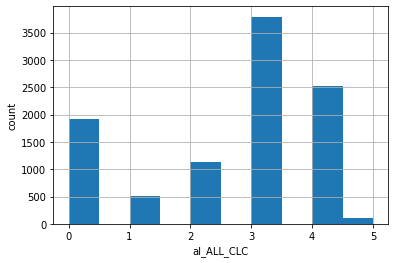

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        2.478870
std         1.440318
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: al_ALL_CLC, dtype: float64
Столбец al_PAY_MAX
Распределение признака:


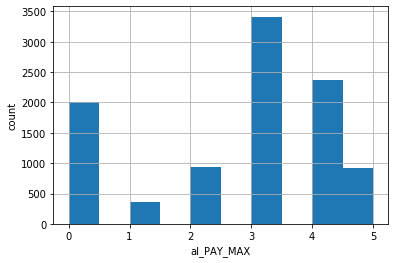

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        2.653615
std         1.589930
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: al_PAY_MAX, dtype: float64
Столбец al_SCORE2
Распределение признака:


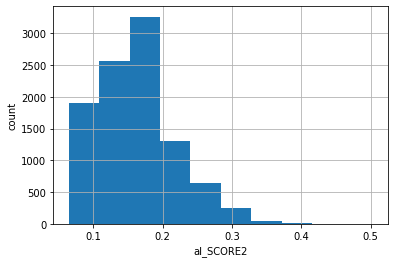

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.162064
std         0.056005
min         0.064373
25%         0.117778
50%         0.162240
75%         0.190126
max         0.503484
Name: al_SCORE2, dtype: float64
Столбец res_npl_15
Распределение признака:


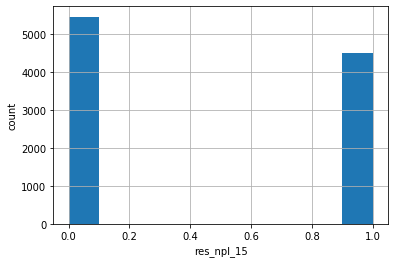

Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.452634
std         0.497776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: res_npl_15, dtype: float64


In [94]:
desription('al_amount')
desription('al_issue_M')
desription('psp_issue_rgn')
desription('sex', boundaries=(1,2))
desription('is_client_local', boundaries=(0,1))
desription('has_snils', boundaries=(0,1))
desription('zaim_cards', boundaries=(0,1))
desription('age')
desription('responsecode', boundaries=(0,3))
desription('was_garant')
desription('is_pboul')
desription('has_foreign_currency_credits')
desription('court_counts')
desription('official_count')
desription('has_resold_credits')
desription('cred_line_state')
desription('potreb_tot')
desription('potreb_closed_tot')
desription('potreb_active_tot')
desription('potreb_other_states_tot')
desription('pdl_tot')
desription('pdl_closed_tot')
desription('pdl_active_tot')
desription('pdl_other_states_tot')
desription('pdl_own_share')
desription('pdl_delay5_cnt')
desription('pdl_delay30_cnt')
desription('pdl_delay60_cnt')
desription('pdl_delay90_cnt')
desription('pdl_delay_more_cnt')
desription('pdl_prolong_cnt')
desription('avg_payout_period_pdl')
desription('avg_pdl_full_cost')
desription('avg_pdl_amount')
desription('pdl_delay5_avg')
desription('pdl_delay30_avg')
desription('pdl_delay60_avg')
desription('pdl_delay90_avg')
desription('pdl_delay_more_avg')
desription('al_LIFETIME_BIN')
desription('al_BLOCK_DUR')
desription('al_CIRCLE')
desription('al_ALL_CLC')
desription('al_PAY_MAX')
desription('al_SCORE2')
desription('res_npl_15')

выведем отдельно признак с выбросом

Столбец responsecode
Распределение признака:


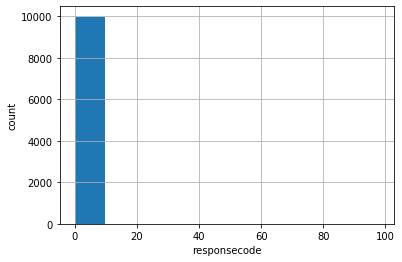

Найдены выбросы:


,al_ContractNumber,al_amount,al_issue_M,psp_issue_rgn,sex,is_client_local,has_snils,zaim_cards,age,responsecode,was_garant,is_pboul,has_foreign_currency_credits,court_counts,official_count,has_resold_credits,cred_line_state,potreb_tot,potreb_closed_tot,potreb_active_tot,potreb_other_states_tot,pdl_tot,pdl_closed_tot,pdl_active_tot,pdl_other_states_tot,...,al_LIFETIME_BIN,al_BLOCK_DUR,al_CIRCLE,al_ALL_CLC,al_PAY_MAX,al_SCORE2,res_npl_15,res_npl_90,res_payout_principal_inTime,res_payout_principal_delay15,res_payout_principal_delay30,res_payout_principal_delay45,res_payout_principal_delay60,res_payout_principal_delay90,res_payout_tot_inTime,res_payout_tot_delay15,res_payout_tot_delay30,res_payout_tot_delay45,res_payout_tot_delay60,res_payout_tot_delay90,fl_cnt,fl_cnt_during_3M,fl_cnt_during_12M,fl_requests_cnt_12M,is_test
1548,37269-008-17,5000,2,77,1,1,0,0,3,98,0,0,0,0,0,1,2,1,8,0,0,1,1,0,0,...,1,0,5,2,5,0.197846,1,1,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5300.0,5300.0,5300.0,5300.0,5300.0,5300.0,1,1,1,1,0


Процент пропусков: 0.0%

Детальное описание:
count    9986.000000
mean        0.578209
std         1.098523
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        98.000000
Name: responsecode, dtype: float64


In [93]:
desription('responsecode', boundaries=(0,3))

удалим этот выброс по индексу

In [107]:
init_data.drop(init_data.index[[1548]], inplace=True)

In [108]:
len(init_data)

9985

Для улучшения качества модели следует уделить побольше внимания преобработке данных, например внимательно изучить распределение некоторых признаков, например логарифмировать их или использовать другие преобразования при необходимости

## Модель

### Датасеты

Было протестировано 6 вариантов датасетов:
1. исходный датасет (вкладка Исх данные), с дополнительной разбивкой обучающей выборки (train) 
2. исходный датасет без данных Мегафона
3. исходный датасет без дополнительной разбивки обучающей выборки
4. преобразованный датасет (вкладка Модель), с дополнительной разбивкой обучающей выборки (train) 
5. преобразованный датасет без данных Мегафона
6. преобразованный датасет без дополнительной разбивки обучающей выборки

Ниже представлен код для всех 6ти вариантов, по итогу лучшие значения метрики (accuracy и roc_auc) получились у варианта 1

#### исходный датасет (вкладка Исх данные), с дополнительной разбивкой обучающей выборки (train)

In [136]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = init_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = init_data.query('is_test == 1').drop(['is_test'], axis=1)

Y = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X = train_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M'], axis=1)

#### исходный датасет без данных Мегафона

In [118]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = init_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = init_data.query('is_test == 1').drop(['is_test'], axis=1)

Y = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X = train_data.drop(['al_ContractNumber', 'al_LIFETIME_BIN', 'al_BLOCK_DUR', 'al_CIRCLE', 'al_ALL_CLC', 'al_PAY_MAX', 'al_SCORE2', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M'], axis=1)

#### исходный датасет без дополнительной разбивки обучающей выборки

In [20]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = init_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = init_data.query('is_test == 1').drop(['is_test'], axis=1)

y_train = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X_train = train_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M'], axis=1)

y_test = test_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X_test = test_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M'], axis=1)

#### преобразованный датасет (вкладка Модель), с дополнительной разбивкой обучающей выборки (train)

In [109]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = upd_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = upd_data.query('is_test == 1').drop(['is_test'], axis=1)

Y = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X = train_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M', 'Без МФ'], axis=1)

#### преобразованный датасет без данных Мегафона

In [110]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = upd_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = upd_data.query('is_test == 1').drop(['is_test'], axis=1)

Y = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X = train_data.drop(['al_ContractNumber', 'al_LIFETIME_BIN', 'al_BLOCK_DUR', 'al_PAY_MAX', 'al_SCORE2', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M', 'Без МФ'], axis=1)

#### преобразованный датасет без дополнительной разбивки обучающей выборки

In [111]:
# Теперь выделим тестовую часть
# is_test – является ли выборка тестовой (0 – обучающая выборка, 1  –  тестовая выборка)
train_data = upd_data.query('is_test == 0').drop(['is_test'], axis=1)
test_data = upd_data.query('is_test == 1').drop(['is_test'], axis=1)

y_train = train_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X_train = train_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M', 'Без МФ'], axis=1)

y_test = test_data.res_npl_15.values            # наш таргет
# 'al_ContractNumber' убираем, так как это не числовые значения, можно будет по индексу восстановить номер контракта
X_test = test_data.drop(['al_ContractNumber', 'res_npl_15', 'res_npl_90',
                     'res_payout_principal_inTime', 'res_payout_principal_delay15', 'res_payout_principal_delay30', 'res_payout_principal_delay45', 'res_payout_principal_delay60', 'res_payout_principal_delay90', 'res_payout_tot_inTime', 'res_payout_tot_delay15', 'res_payout_tot_delay30', 'res_payout_tot_delay45', 'res_payout_tot_delay60', 'res_payout_tot_delay90', 'fl_cnt', 'fl_cnt_during_3M', 'fl_cnt_during_12M', 'fl_requests_cnt_12M', 'Без МФ'], axis=1)

### сама модель

Анна Григорян при разговоре со мной уточнила, что обязательно знание XGBoost, именно его и будем использовать для создания модели

В качестве метрики были выбраны accuracy (как одна из основных для моделей классификации) и roc_auc

In [137]:
# Первая XGBoost модель
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
 # обучаем модель на тренировочной выборке
model = XGBClassifier()
model.fit(X_train, y_train)
# делаем предсказание на тестовой выборке
predictions = model.predict(X_test)
# оцениваем предсказания
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.23%


In [138]:
roc_auc = roc_auc_score(y_test, predictions)
print("Roc_auc: %.2f%%" % (roc_auc * 100.0))

Roc_auc: 76.61%


Поскольку XGBoost может оценивать производительность во время обучения, а также оценивать метрики во время обучения модели, продемонстрируем эту возможность модели

Также есть возможность прервать обучение модели, как только не будет дальнейших улучшений

In [115]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss",
eval_set=eval_set, verbose=True)
y_predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.664596
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.640761
[2]	validation_0-logloss:0.621129
[3]	validation_0-logloss:0.605283
[4]	validation_0-logloss:0.591464
[5]	validation_0-logloss:0.580116
[6]	validation_0-logloss:0.57042
[7]	validation_0-logloss:0.562112
[8]	validation_0-logloss:0.555167
[9]	validation_0-logloss:0.549113
[10]	validation_0-logloss:0.544201
[11]	validation_0-logloss:0.538879
[12]	validation_0-logloss:0.535164
[13]	validation_0-logloss:0.532368
[14]	validation_0-logloss:0.529574
[15]	validation_0-logloss:0.526442
[16]	validation_0-logloss:0.524493
[17]	validation_0-logloss:0.522789
[18]	validation_0-logloss:0.521298
[19]	validation_0-logloss:0.519917
[20]	validation_0-logloss:0.518712
[21]	validation_0-logloss:0.517049
[22]	validation_0-logloss:0.51543
[23]	validation_0-logloss:0.514726
[24]	validation_0-logloss:0.51362
[25]	validation_0-logloss:0.512796
[26]	validation_0-logloss:0.511763


### Оценка значимости признаков

Одним из преимуществ использования ансамблей решающих деревьев, а именно градиентного бустинга, заключается в том, что такие модели могут автоматически оценивать важность признаков полученной модели. Например, можно вывести вот так значимость признаков

In [116]:
print(model.feature_importances_)

[0.03397955 0.05742941 0.02973461 0.01750569 0.07626306 0.01744498
 0.         0.01874017 0.36795315 0.         0.         0.
 0.         0.         0.01663323 0.         0.02307475 0.01779856
 0.0270298  0.00865474 0.         0.0298184  0.         0.
 0.         0.0215728  0.         0.01193989 0.0095041  0.
 0.         0.         0.00347926 0.01694115 0.         0.
 0.         0.02216711 0.01381647 0.05766038 0.02626134 0.00478338
 0.02321849 0.01331688 0.03327864]


В XGBoost есть функция plot_importance, которая используется для построения графика для признаков, упорядоченных по их важности

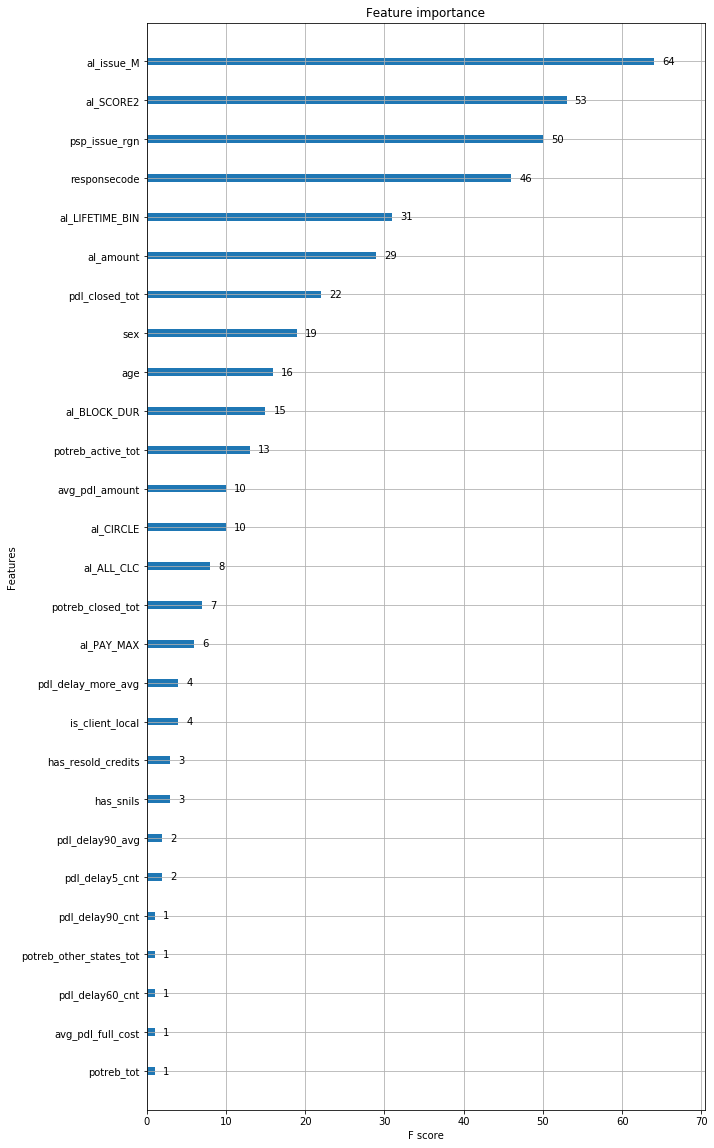

In [117]:
fig, ax = plt.subplots(figsize=(10,20))
plot_importance(model, ax=ax)

Можно оценивать значимость признаков с помощью SelectFromModel, который может преобразовать датасет в несколько датасетов с выбранными признаками.

SelectFromModel использует предварительно обученную модель на всем объеме признаков, а потом использует трешхолды, чтобы решить, какие признаки выбрать

In [122]:
# Обучаем модель, используя значимость каждого признака как трешхолд
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # выбираем признаки с помощью трешхолда
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # обучаем модель
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # оцениваем модель 
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" %
          (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.000, n=45, Accuracy: 77.09%
Thresh=0.004, n=30, Accuracy: 77.09%
Thresh=0.005, n=29, Accuracy: 77.26%
Thresh=0.007, n=28, Accuracy: 77.31%
Thresh=0.010, n=27, Accuracy: 77.44%
Thresh=0.011, n=26, Accuracy: 77.39%
Thresh=0.011, n=25, Accuracy: 77.26%
Thresh=0.011, n=24, Accuracy: 77.39%
Thresh=0.013, n=23, Accuracy: 77.57%
Thresh=0.014, n=22, Accuracy: 77.26%
Thresh=0.014, n=21, Accuracy: 77.31%
Thresh=0.015, n=20, Accuracy: 77.39%
Thresh=0.015, n=19, Accuracy: 77.18%
T

Есть еще способ, как получить значимость признаков, используя plot_importance

Рассчитаем 2 типа значимости признаков:
Вес = количество раз, когда признак появляется в дереве
Прирост = средний прирост ветвлений, в которых используется признак = усреднение всех значений прироста для признака, если он появляется несколько раз
Нормализованный прирост = доля среднего прироста от общего среднего прироста

In [123]:
k = model.get_booster().trees_to_dataframe()
group = k[k['Feature']!='Leaf'].groupby('Feature').agg(fscore = ('Gain', 'count'),
feature_importance_gain = ('Gain', 'mean'))

# значимость признаков такая же как в plot_importance(importance_type = ‘weight’), значение по умолчанию
group['fscore'].sort_values(ascending=False)

# значимость признаков такая же как в model.feature_importance_ default = ‘gain’
group['feature_importance_gain_norm'] = group['feature_importance_gain']/group['feature_importance_gain'].sum()
group[['feature_importance_gain_norm']].sort_values(by='feature_importance_gain_norm', ascending=False)


# значимость признаков такая же как в plot_importance(importance_type = ‘gain’)
group[['feature_importance_gain']].sort_values(by='feature_importance_gain', ascending=False)

,feature_importance_gain
Feature,
responsecode,98.743981
is_client_local,18.432668
al_LIFETIME_BIN,16.402518
al_issue_M,15.141116
al_amount,9.900075
potreb_active_tot,8.603562
psp_issue_rgn,8.400461
pdl_closed_tot,7.937999
al_SCORE2,7.628205


In [124]:
group[['feature_importance_gain_norm']].sort_values(by='feature_importance_gain_norm', ascending=False)

,feature_importance_gain_norm
Feature,
responsecode,0.352344
is_client_local,0.065772
al_LIFETIME_BIN,0.058528
al_issue_M,0.054027
al_amount,0.035326
potreb_active_tot,0.030700
psp_issue_rgn,0.029975
pdl_closed_tot,0.028325
al_SCORE2,0.027219


На основе полученных данных о значимости признаков, можно сделать еще одно преобразование датасета, а именно удалить незначимые признаки, но из-за ограниченности времени оставим эту задачу как точку роста для модели

## Подбор гиперпараметров

попробуем улучшить качество нашей модели с помощью подбора гиперпараметров, для этого будем использовать GridSearch и Hyperopt

### GridSearch

In [125]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.508337 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
-0.691744 (0.000083) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}
-0.690354 (0.000166) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
-0.688978 (0.000248) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 150}
-0.687617 (0.000331) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 200}
-0.691642 (0.000086) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 50}
-0.690151 (0.000171) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-0.688675 (0.000254) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 150}
-0.687214 (0.000336) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
-0.691586 (0.000086) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 50}
-0.690046 (0.000169) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
-0.688523 (0.000251) 

запустим модель с подобранными с помощью GridSearch гиперпараметрами и оценим accuracy и roc_auc

In [126]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# обучаем модель на тренировочной выбор
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)
model.fit(X_train, y_train)
# делаем предсказание на тестовой выборке
predictions = model.predict(X_test)
# оцениваем предсказания
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.92%


In [127]:
roc_auc = roc_auc_score(y_test, predictions)
print("Roc_auc: %.2f%%" % (roc_auc * 100.0))

Roc_auc: 76.50%


с подобранными ГП с помощью gridsearch результат ухудшился

### Hyperopt

проделаем те же шаги (подбор ГП и запуск модели с подобранными ГП) для Hyperopt

In [139]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    # усреднение по 3ем фолдам, для уменьшения влияния стохастичности
    # для ускорения можно использовать train_test_split один раз
    current_score = cross_val_score(clf, X, Y, cv=3).mean()
    print(current_score, params)
    return -current_score


space_xgb2 = {
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    # 'nthread': 4,
    'booster': 'gbtree',
    'tree_method': 'exact',
    'silent': 1
}

best = fmin(fn=hyperopt_xgb_score, space=space_xgb2,
            algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.743748004186827                                     
{'booster': 'gbtree', 'colsample_bytree': 0.6000000000000001, 'eta': 0.275, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 5, 'min_child_weight': 4.0, 'n_estimators': 575, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8, 'tree_method': 'exact'}
0.7410319827605855                                                              
{'booster': 'gbtree', 'colsample_bytree': 0.9500000000000001, 'eta': 0.42500000000000004, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 12, 'min_child_weight': 1.0, 'n_estimators': 261, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8500000000000001, 'tree_method': 'exact'}
0.7413185956239277                                                              
{'booster': 'gbtree', 'colsample_bytree': 0.8500000000000001, 'eta': 0.17500000000000002, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 9, 'min_child_weight': 2.0, 'n_estimators': 238, 'objective': 'binary:logistic', 'silent': 1

извлечем лучшие ГП (а не их индексы) с помощью space_eval

In [141]:
from hyperopt import space_eval

In [144]:
space_eval(space_xgb2, best)

{'booster': 'gbtree',
 'colsample_bytree': 1.0,
 'eta': 0.4,
 'eval_metric': 'auc',
 'gamma': 0.9,
 'max_depth': 1,
 'min_child_weight': 5.0,
 'n_estimators': 410,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.6000000000000001,
 'tree_method': 'exact'}

In [145]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed)
# обучаем модель на тренировочной выборке
clf = XGBClassifier(booster='gbtree', colsample_bytree=1.0, eta=0.4, eval_metric='auc', gamma=0.9, max_depth=1,
                    min_child_weight=5.0, n_estimators=410, objective='binary:logistic', silent=1, subsample=0.6000000000000001, tree_method='exact')
clf.fit(X_train, y_train)
# делаем предсказание на тестовой выборке
predictions = clf.predict(X_test)
# оцениваем предсказания
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.10%


In [146]:
roc_auc = roc_auc_score(y_test, predictions)
print("Roc_auc: %.2f%%" % (roc_auc * 100.0))

Roc_auc: 76.42%


## Выводы

Самый лучший результат дал исходный датасет (вкладка Исх данные), с дополнительной разбивкой обучающей выборки (train) с параметрами по умолчанию

Accuracy: 77.23% Roc_auc: 76.61%

## Точки роста

1. Скорректировать набор признаков на основе их значимости (результаты значимости получены)
2. Добавить больше гиперпараметров в GridSearch и Hyperopt, изменить диапазоны гиперпараметров
3. Тщательнее изучить распределение некоторых признаков, например логарифмировать их или использовать другие преобразования при необходимости, чтобы сделать распределение нормальным